<h1>Question Number 1</h1>
References: https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c

## Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans

np.random.seed(0)

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data',na_values='?',header=None)

In [3]:
df.columns = ["Sample Code Number id number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]
df.head()

,Sample Code Number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
df.shape

(699, 11)

## Deleting the column 'Class'

In [5]:
df_without_class = df.drop(columns=['Class'],axis=1)
df_without_class.head()

,Sample Code Number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1


In [6]:
df_without_class.shape

(699, 10)

### Replacing the missing columns with the mean values

#### We will be using all the columns except the column 'Class'

In [7]:
df['Bare Nuclei']=df['Bare Nuclei'].fillna(df['Bare Nuclei'].mean())


In [8]:
df_sliced=df.loc[:,'Clump Thickness':'Mitoses'] 
df_sliced.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


## Here we are initialize method to generate k random points and initializing clusters with the same points

In [9]:
def clusters_initializaton(p, number):
    return p[np.random.randint(0, len(df_sliced), size=number)]

## Writing the distance_bw_centroids method to calculate the distances between centroids.
### The given method returns distances for the centroid from the passed point p

In [10]:
def distance_bw_centroids(ctrd, p):
    return np.sqrt(np.sum((p - ctrd)**2,axis=1))

## Demonstrating a histogram for all the columns

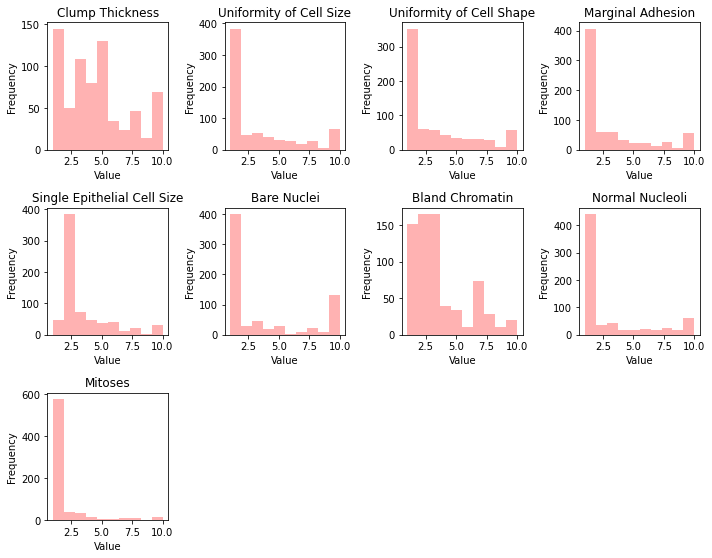

In [11]:
# ploting the histogram of the columns.
col_heading = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin", "Normal Nucleoli", "Mitoses"]
z=1
fig1 = plt.figure(figsize=(10,10))
for l in (list(df_sliced)):

    zx = fig1.add_subplot(4,4,z)
    zx.hist(df_sliced[l], color = "red", alpha = 0.3)
    zx.set_title(col_heading[z-1])
    zx.set_ylabel("Frequency")
    zx.set_xlabel("Value")
    plt.tight_layout()   
    z+=1
plt.show()

## Here we firstly initialize the centroids. Then we initialize the vectors which will be used to store the classes for the data points and we are calculating the distances from each centroids.

### Then for the number of iterations we are assigning the datapoints to the nearest centroid. We basically decide the class of the datapoint by choosing the centroid which is closes to the particular data point.

In [12]:
def main():

    df_sliced_values = df_sliced.values
    m = 2
    numberOfIter = 2000
    
    ctds = clusters_initializaton(df_sliced_values, m)
    cls = np.zeros(df_sliced_values.shape[0])
    dist = np.zeros([df_sliced_values.shape[0], m])

    for i in range(numberOfIter):  
        for i, cent in enumerate(ctds):
            dist[:, i] = distance_bw_centroids(cent, df_sliced_values)
        cls = np.argmin(dist, axis=1) 
        for cent in range(m):
            ctds[cent] = np.mean(df_sliced_values[cls == cent], 0)
            
    print("Clusters:")               
    print("Benign:",ctds[0],"\nMalignant:",ctds[1])
    cls[cls==0]=2
    cls[cls==1]=4

    dataFrame_next = pd.DataFrame()
    dataFrame_next['ID']=df['Sample Code Number id number']
    dataFrame_next['class']=df['Class']
    dataFrame_next['Class Predicted']=cls
    dataFrame_next.to_csv("output.csv")
    
    print("Original class and Predicted classes:")
    print(dataFrame_next.head())

main()

Clusters:
Benign: [3.03232759 1.29525862 1.43534483 1.33836207 2.08836207 1.36322386
 2.09267241 1.24784483 1.10991379] 
Malignant: [7.15319149 6.76595745 6.70638298 5.70638298 5.44255319 7.85182393
 6.09361702 6.06382979 2.53617021]
Original class and Predicted classes:
        ID  class  Class Predicted
0  1000025      2                2
1  1002945      2                4
2  1015425      2                2
3  1016277      2                4
4  1017023      2                2


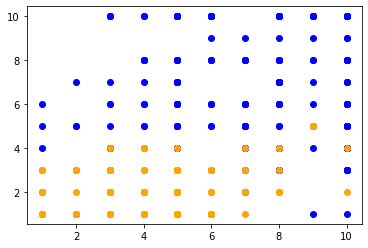

In [16]:
from sklearn.cluster import KMeans
dataValues1=df.loc[:,'Clump Thickness':'Mitoses'].values
dataValues_class=df['Class']

k = KMeans(
    n_clusters=2, init='random',
    max_iter=500, 
    random_state=0)
k2 = k.fit_predict(dataValues1)

plt.scatter(dataValues1[k2 == 0, 0], dataValues1[k2 == 0, 1],c='blue')
plt.scatter(dataValues1[k2 == 1, 0], dataValues1[k2 == 1, 1],c='orange')
plt.show()

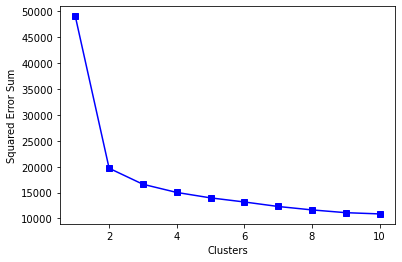

In [18]:
l = []
k=range(1, 11)
for i in k:
    k_means = KMeans(
        n_clusters=i, init='random', max_iter=300, random_state=0)
    k_means.fit(dataValues1)
    l.append(k_means.inertia_)
plt.plot(k, l, color = "blue", marker='s')
plt.xlabel('Clusters')
plt.ylabel('Squared Error Sum')
plt.show()

## We get accuracy 66 percent

In [19]:
import math
z = []
for var in dataValues_class:
    if var=='4':
        z.append(0)
    else:
        z.append(1)
acc = metrics.accuracy_score(z, k2)
print("Accuracy:",math.floor(acc*100),"%")

Accuracy: 66 %


## Using Support Vector Machine (Supervised Method)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


In [27]:
df_supervised = pd.read_csv('breast-cancer-wisconsin.data',na_values='?',header=None)
df_supervised.columns = ["Sample Code Number id number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]
df_supervised.head()

,Sample Code Number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [28]:
np.any(np.isnan(df_supervised))

True

In [30]:
df_supervised2 = df_supervised.fillna(df_supervised.mean())
np.any(np.isnan(df_supervised2))

False

In [31]:
X = df_supervised2.values[:,1:10]
Y = df_supervised2.values[:,-1]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [44]:
classifier = svm.SVC(kernel='linear')
classifier.fit(train_x, train_y)
y_prediction = classifier.predict(test_x)
y_prediction

array([2., 4., 4., 4., 2., 2., 2., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2.,
       4., 2., 4., 4., 2., 2., 2., 4., 4., 4., 2., 2., 4., 2., 4., 2., 4.,
       4., 4., 4., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 4.,
       2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 4., 2., 4., 2.,
       2., 4., 2., 4., 2., 4., 4., 2., 2., 2., 4., 4., 2., 2., 2., 2., 4.,
       4., 2., 2., 2., 4., 2., 4., 2., 2., 4., 4., 2., 2., 2., 2., 4., 4.,
       4., 4., 4., 4., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 4., 4., 4.,
       4., 2., 4., 2., 2., 2., 2., 2., 4., 2., 2., 4., 4., 2., 4., 4., 4.,
       4., 2., 4., 2., 4., 2., 2., 2., 2., 4., 4., 4., 4., 2., 2., 2., 4.,
       4., 2., 2., 2., 4., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 4., 4.,
       2., 2., 2., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2.,
       4., 2., 4., 2., 4., 4., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 4.,
       4., 4., 4., 2., 2., 2.])

In [45]:
z = classifier.predict(test_x)
z

array([2., 4., 4., 4., 2., 2., 2., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2.,
       4., 2., 4., 4., 2., 2., 2., 4., 4., 4., 2., 2., 4., 2., 4., 2., 4.,
       4., 4., 4., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 4.,
       2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 4., 2., 4., 2.,
       2., 4., 2., 4., 2., 4., 4., 2., 2., 2., 4., 4., 2., 2., 2., 2., 4.,
       4., 2., 2., 2., 4., 2., 4., 2., 2., 4., 4., 2., 2., 2., 2., 4., 4.,
       4., 4., 4., 4., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 4., 4., 4.,
       4., 2., 4., 2., 2., 2., 2., 2., 4., 2., 2., 4., 4., 2., 4., 4., 4.,
       4., 2., 4., 2., 4., 2., 2., 2., 2., 4., 4., 4., 4., 2., 2., 2., 4.,
       4., 2., 2., 2., 4., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 4., 4.,
       2., 2., 2., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2.,
       4., 2., 4., 2., 4., 4., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 4.,
       4., 4., 4., 2., 2., 2.])

In [46]:
acc = accuracy_score(test_y,z)*100
print("Accuracy:", math.floor(acc), "%")

Accuracy: 94 %


### Here we can clearly observe that when we use Supervised Models, the accuracy is much more than the case where we use unsupervised models. In this case, using SVM, we get an accuracy of 94% whereas using K Means we get an accuracy of 66%

# Question 3
References: https://towardsdatascience.com/the-bias-variance-trade-off-explained-practically-in-python-48cf29d9e900

### In this question we are not given the data set. So we will randomly generate the dataset using the numpy.random.normal() function. So as per the question, we generate two guassian distributions. The second gaussian distribution will have an offset of 2. And we are labelling the two distributions as 1 and 2 both of size 500 each

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_X_1 = np.random.normal(loc=0,scale=1,size=500)
data_Y_1 = np.random.normal(loc=0,scale=1,size=500)
label_1 = np.repeat(1,500)

#print(data_X_1)
#print(data_Y_1)

data_X_2 = np.random.normal(loc=2,scale=1,size=500)
data_Y_2 = np.random.normal(loc=2,scale=1,size=500)
label_2 = np.repeat(2,500)

#print(data_X_2)
#print(data_Y_2)

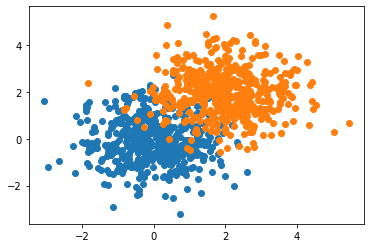

In [50]:
plt.scatter(data_X_1,data_Y_1)
plt.scatter(data_X_2,data_Y_2)
plt.show()

### Here we are merging the two dataframes into one using the concat function.


In [53]:
coordinates_1 = {'x': data_X_1, 'y':data_X_2, 'label': label_1}
df1 = pd.DataFrame(coordinates_1, columns=['x', 'y', 'label'])
coordinates_2 = {'x': data_X_2, 'y':data_X_2, 'label': label_2}
df2 = pd.DataFrame(coordinates_2, columns=['x', 'y', 'label'])

df_concat = [df1,df2]
df = pd.concat(df_concat)

#getting a dataframe without the column label
df_X_Y = df.drop(["label"],axis=1)

#getting a dataframe without the columns x and y
df_label = df.drop(['x','y'],axis = 1)

df_X_Y.tail()




,x,y
495,1.224219,1.224219
496,3.189904,3.189904
497,0.884092,0.884092
498,3.589600,3.589600
499,2.424433,2.424433


### Here we are splitting the data set into training and testing datasets

In [54]:
train_data_x,test_data_x,train_data_y,taest_data_y = train_test_split(df_X_Y,df_label , test_size=0.2, random_state=30)


### As mentioned in the question, we can use Ridge regression to calculate the value of Hd. and so with the help of Hd we can calculate bias.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
ridge = Ridge()
model=ridge.fit(train_data_x, train_data_y)
print("Model score: " , ridge.score(test_data_x,test_data_y))


Model score:  0.6021702180592576


In [58]:
predictons = model.predict(test_data_x) #Predictions on Testing data
print(predictons)

[[1.58456887]
 [1.69663752]
 [1.51073238]
 [1.37877522]
 [1.71474244]
 [1.29144909]
 [2.00301103]
 [1.14748521]
 [0.90431199]
 [1.68561988]
 [1.16074256]
 [1.98017571]
 [1.55847641]
 [0.54876912]
 [1.58487852]
 [0.57254086]
 [1.78435139]
 [0.80217671]
 [1.86555605]
 [2.12551878]
 [1.96016083]
 [1.10233498]
 [0.81550406]
 [1.37560614]
 [0.65151395]
 [1.59048862]
 [1.84704119]
 [1.31264203]
 [1.94844099]
 [1.88840511]
 [1.26068787]
 [1.30140398]
 [1.90289474]
 [0.80349893]
 [2.15152371]
 [0.73262422]
 [1.63059997]
 [1.30868782]
 [1.15148706]
 [1.87428931]
 [1.72928443]
 [1.70395077]
 [1.08719818]
 [0.71275949]
 [1.64055654]
 [0.95839908]
 [1.49445173]
 [1.6074732 ]
 [1.78592419]
 [1.26480245]
 [1.9048681 ]
 [1.71797784]
 [0.79104549]
 [1.85546694]
 [1.73527783]
 [1.35662424]
 [1.77021234]
 [1.8469588 ]
 [1.75236366]
 [0.88794491]
 [1.06876572]
 [1.52944731]
 [1.78210997]
 [1.52035842]
 [0.67244508]
 [1.91926068]
 [1.77139715]
 [2.01128775]
 [1.66405066]
 [1.28803011]
 [1.60494271]
 [1.45

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data_y,DT_predict)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.09882091783408038


### Creating a function toydata to generate multiple datasets

In [63]:
def toydata():

    data_X_1 = np.random.normal(loc=0,scale=1,size=500)
    data_Y_1 = np.random.normal(loc=0,scale=1,size=500)
    data_X_2 = np.random.normal(loc=2,scale=1,size=500)
    data_Y_2 = np.random.normal(loc=0,scale=1,size=500)
   
    coordinates_1 = {'x': data_X_1, 'y':data_X_2, 'label': label_1}
    df1 = pd.DataFrame(coordinates_1, columns=['x', 'y', 'label'])
    coordinates_2 = {'x': data_X_2, 'y':data_X_2, 'label': label_2}
    df2 = pd.DataFrame(coordinates_2, columns=['x', 'y', 'label'])
    
    df_concat = [df1,df2]
    df = pd.concat(df_concat)
    return df


df_test = toydata()
df_test.head()

,x,y,label
0,1.146094,2.684548,1
1,-0.351436,0.866715,1
2,0.845789,1.972608,1
3,0.019796,2.510286,1
4,-0.707413,2.595809,1


### Below method can be used to compute h bar. 


In [65]:
def computehbar(df):
    df_X_Y = df.drop(["label"],axis=1)
    df_label = df.drop(['x','y'],axis = 1)
    train_data_x,test_data_x,train_data_y,test_data_y = train_test_split(df_X_Y,df_label , test_size=0.2, random_state=30)
    ridge = Ridge()
    DT_model=ridge.fit(train_data_x, train_data_y)
    DT_predict = DT_model.predict(test_data_x) #Predictions on Testing data
    return DT_predict

df_test = toydata()
result = computehbar(df_test)
print(result)
    


[[1.80722966]
 [1.78748379]
 [1.89129434]
 [1.45052812]
 [1.72570643]
 [0.69334838]
 [1.51207319]
 [1.14111587]
 [1.13667463]
 [1.60216022]
 [1.63227461]
 [1.90811436]
 [1.40697326]
 [1.31318302]
 [1.78815145]
 [1.85730324]
 [1.86835595]
 [1.10678643]
 [1.62368074]
 [1.81124642]
 [1.87311926]
 [1.39164076]
 [1.27138864]
 [0.84853845]
 [0.98058388]
 [1.62950971]
 [1.71341521]
 [1.06356233]
 [1.59456517]
 [1.81507153]
 [1.27220991]
 [1.044354  ]
 [1.57784087]
 [0.80998717]
 [1.91455671]
 [1.53820233]
 [1.63129543]
 [1.58611985]
 [0.95911557]
 [1.70724314]
 [1.63582199]
 [1.82979434]
 [1.24206444]
 [0.64088071]
 [1.53039264]
 [1.20905247]
 [1.74924497]
 [1.20664383]
 [1.55211582]
 [1.42587669]
 [1.63211749]
 [1.95444066]
 [0.44463542]
 [1.63092418]
 [1.82679474]
 [0.56018738]
 [2.08473636]
 [1.76648442]
 [1.79509648]
 [1.6342924 ]
 [0.68764811]
 [1.0247648 ]
 [1.84495849]
 [0.5259214 ]
 [2.11767307]
 [1.74587972]
 [1.68886979]
 [1.9245385 ]
 [1.89502648]
 [1.11552017]
 [1.90702747]
 [1.40

### As per the question,  generating random dataset for 25 distributions.  Hence, calling the method toy data in a loop. And also calling computehbar function for all the distributions

In [67]:
#computing for 25 different data sets
listOfDatasets = []
for i in range(0,25):
    listOfDatasets.append(toydata()) 
    
computerhbar_results = []
for i in range(0,25):
    computerhbar_results.append(computehbar(listOfDatasets[i]))

In [68]:
#DT_predict_new = DT_model.predict(df_test.drop(["label"],axis=1))
#print(DT_predict_new)

predict_list = []
for i in range(0,25):
    predict_list.append(DT_model.predict(listOfDatasets[i].drop(["label"],axis=1)))



In [70]:
for i in range(0,25):
    print(mean_squared_error(listOfDatasets[i].drop(['x','y'],axis = 1),predict_list[i]))

0.10071297959362842
0.11041782257601573
0.10382738029943256
0.10471658012628884
0.11203930943246093
0.10093210191371951
0.10956088252916979
0.10731223903751494
0.10714153802781419
0.10505086473785034
0.1066658198109868
0.11151161521548052
0.10933553481444741
0.09774874973361221
0.10506787533917714
0.10652679828210862
0.10803113893406473
0.11031187768908436
0.1152819034821524
0.11273921709176606
0.11045392879963037
0.10796494527652163
0.10937648114478134
0.10479174182556761
0.10800005621192652


### Averaging all the predictions 

In [71]:
total = predict_list[0]
for i in range(1,25):
    total = predict_list[i] + total
total = total / 25
#total_sum = sum(total)
#average_predicton = total_sum/len(total)
print(total)

[[1.29739855]
 [1.23039605]
 [1.14711006]
 [1.25300071]
 [1.28587721]
 [1.18713313]
 [1.24819738]
 [1.2027815 ]
 [1.12668404]
 [1.22958417]
 [1.23733255]
 [1.08864899]
 [1.14058454]
 [1.14442809]
 [1.12748658]
 [1.22564177]
 [1.17906764]
 [1.08642368]
 [1.29112013]
 [1.13850246]
 [1.19124031]
 [1.22515755]
 [1.08885668]
 [1.18407065]
 [1.17122417]
 [1.34045415]
 [1.13887728]
 [1.27289509]
 [1.21838562]
 [1.22695463]
 [1.15089524]
 [1.28375718]
 [1.19765789]
 [1.24164282]
 [1.13128188]
 [1.14856787]
 [1.16188184]
 [1.20051399]
 [1.20427922]
 [1.2702169 ]
 [1.06996083]
 [1.14750829]
 [1.27767511]
 [1.27402187]
 [1.20534348]
 [1.2404418 ]
 [1.31247554]
 [1.1407522 ]
 [1.1442166 ]
 [1.24884548]
 [1.1043226 ]
 [1.13886116]
 [1.22227585]
 [1.20268877]
 [1.23991119]
 [1.21038334]
 [1.27118871]
 [1.19712174]
 [1.28904268]
 [1.27862498]
 [1.26287564]
 [1.15414946]
 [1.27210802]
 [1.1929962 ]
 [1.20288189]
 [1.22624809]
 [1.21025182]
 [1.12979302]
 [1.27273733]
 [1.2778707 ]
 [1.16346756]
 [1.29

### Now using the above values, we will compute the value of h bar

In [73]:
sum_of_predictions = sum(total)
h_bar = sum_of_predictions / len(total)
print(h_bar)

[1.49281972]


### Now we will use the value of h bar to further compute other variables within bias variance demo. As per the question, again we will approximate the term, variance by averaging over the 25 randomly generated distributons 

In [74]:
def computevariance(h_bar, total):
    total_minus_hbar = total - h_bar
    total_minus_hbar_squared = np.square(total_minus_hbar)
    return total_minus_hbar_squared
variance_array = computevariance(h_bar, total)

print(variance_array)

[[0.03818944]
 [0.06886618]
 [0.11951517]
 [0.05751316]
 [0.0428252 ]
 [0.09344429]
 [0.05984009]
 [0.08412217]
 [0.13405534]
 [0.06929295]
 [0.06527369]
 [0.16335398]
 [0.12406962]
 [0.12137673]
 [0.13346831]
 [0.07138406]
 [0.09844036]
 [0.16515775]
 [0.04068272]
 [0.12554072]
 [0.09095014]
 [0.07164304]
 [0.16318614]
 [0.09532599]
 [0.1034237 ]
 [0.02321527]
 [0.12527525]
 [0.04836684]
 [0.07531408]
 [0.07068425]
 [0.11691235]
 [0.04370715]
 [0.08712051]
 [0.06308984]
 [0.13070961]
 [0.11850934]
 [0.10951988]
 [0.08544264]
 [0.08325562]
 [0.04955201]
 [0.17880964]
 [0.11923998]
 [0.0462872 ]
 [0.0478725 ]
 [0.08264259]
 [0.06369461]
 [0.03252402]
 [0.12395154]
 [0.12152413]
 [0.05952343]
 [0.15093001]
 [0.12528666]
 [0.07319398]
 [0.08417597]
 [0.06396272]
 [0.07977031]
 [0.0491203 ]
 [0.08743729]
 [0.04152508]
 [0.04587939]
 [0.05287428]
 [0.11469754]
 [0.04871365]
 [0.08989414]
 [0.08406395]
 [0.07106043]
 [0.07984462]
 [0.13178838]
 [0.04843626]
 [0.04620308]
 [0.10847284]
 [0.04

### So, as per the formula of variance, we subtracted h bar (mean) from all the predicted values and calculated the square of those values. So taking an approximate value from the all the above values to get the variance.

In [76]:
sum_term = sum(variance_array)
variance = sum_term / len(variance_array)
print(variance)

[0.08318292]


#### Now lets plot all the values in the graph

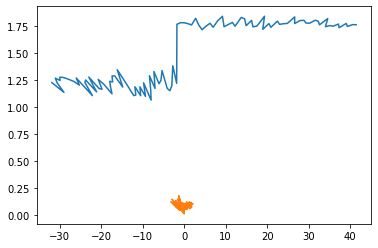

In [77]:
def biasvariancedemo(bias_array, variance_array):
    i = 9
    bias_array = bias_array.tolist()
    variance_array = variance_array.tolist()
    bias_plot = []
    var_plot = []
    k = 0
    while(k != 100):
        bias_plot.append(bias_array[i][0])
        var_plot.append(variance_array[i][0])
        k = k + 1
        i = i + 10
        
    reg = []
    x = -26.0
    for i in range(0,115):
        reg.append(x)
        x = x + 0.5
    bias_reg = []
    var_reg = []
    
    
    for i in range(0,100):
        bias_reg.append(float(bias_plot[i]) * float(reg[i]))
        var_reg.append(float(var_plot[i]) * float(reg[i]))
        
    
    plt.plot(bias_reg, bias_plot, label = "curve 1", linestyle="-")
    plt.plot(var_reg, var_plot, label = "curve 1", linestyle="-")
    
    #plt.plot(sq_err, reg)
    #plt.legend()
    #plt.show()
biasvariancedemo(total, variance_array)